In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

TASK 1: You are working for a car dealership company aiming to enhance its pricing strategy.
The company has collected a vast dataset containing various attributes of cars, including features
such as mileage, horsepower, number of doors, brand, model year, and more. Your task is to
develop a robust machine learning model to predict car prices accurately based on these features.
Download the dataset

● Perform necessary EDA and Data Wrangling
● Implement Linear Regression
● Evaluate LR using different metrics
● Plot training and testing results

In [319]:
df =  pd.read_csv("CarPrice_Assignment.csv")

In [320]:
df.shape

(205, 26)

In [321]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [322]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [323]:
columns = ['wheelbase', 'enginesize', 'boreratio', 'stroke', 'price', 
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [324]:
df[columns].describe()

,wheelbase,enginesize,boreratio,stroke,price,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,126.907317,3.329756,3.255415,13276.710571,10.142537,104.117073,5125.121951,25.219512,30.751220
std,6.021776,41.642693,0.270844,0.313597,7988.852332,3.972040,39.544167,476.985643,6.542142,6.886443
min,86.600000,61.000000,2.540000,2.070000,5118.000000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,94.500000,97.000000,3.150000,3.110000,7788.000000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,97.000000,120.000000,3.310000,3.290000,10295.000000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,102.400000,141.000000,3.580000,3.410000,16503.000000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,120.900000,326.000000,3.940000,4.170000,45400.000000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [325]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [326]:
df.duplicated().sum()

0

wheelbase              Axes(0.125,0.11;0.065678x0.77)
enginesize          Axes(0.203814,0.11;0.065678x0.77)
boreratio           Axes(0.282627,0.11;0.065678x0.77)
stroke              Axes(0.361441,0.11;0.065678x0.77)
price               Axes(0.440254,0.11;0.065678x0.77)
compressionratio    Axes(0.519068,0.11;0.065678x0.77)
horsepower          Axes(0.597881,0.11;0.065678x0.77)
peakrpm             Axes(0.676695,0.11;0.065678x0.77)
citympg             Axes(0.755508,0.11;0.065678x0.77)
highwaympg          Axes(0.834322,0.11;0.065678x0.77)
dtype: object

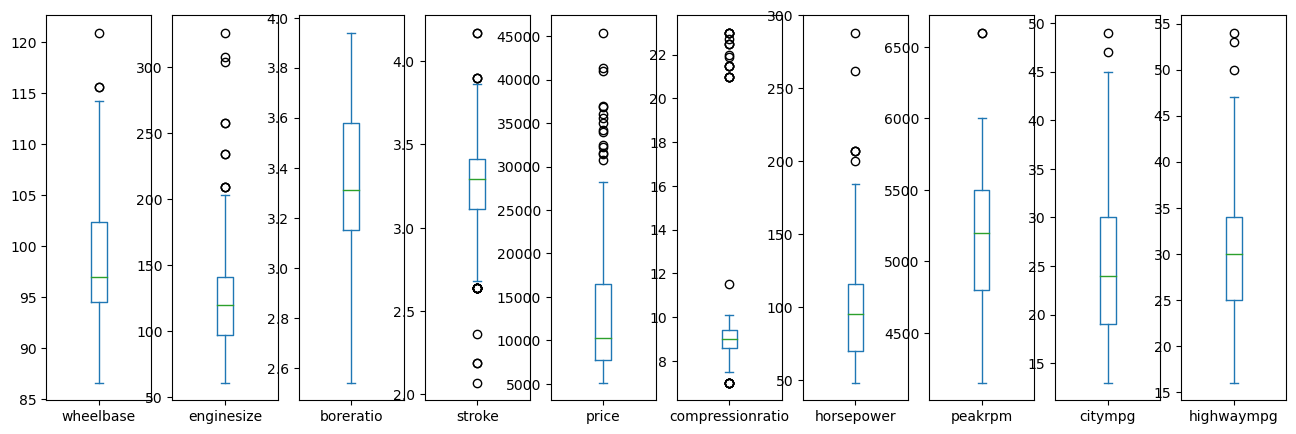

In [327]:
df[columns].plot(kind='box', subplots=True, layout=(1, 10), figsize=(16, 5))

In [329]:
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

wheelbase              Axes(0.125,0.11;0.065678x0.77)
enginesize          Axes(0.203814,0.11;0.065678x0.77)
boreratio           Axes(0.282627,0.11;0.065678x0.77)
stroke              Axes(0.361441,0.11;0.065678x0.77)
price               Axes(0.440254,0.11;0.065678x0.77)
compressionratio    Axes(0.519068,0.11;0.065678x0.77)
horsepower          Axes(0.597881,0.11;0.065678x0.77)
peakrpm             Axes(0.676695,0.11;0.065678x0.77)
citympg             Axes(0.755508,0.11;0.065678x0.77)
highwaympg          Axes(0.834322,0.11;0.065678x0.77)
dtype: object

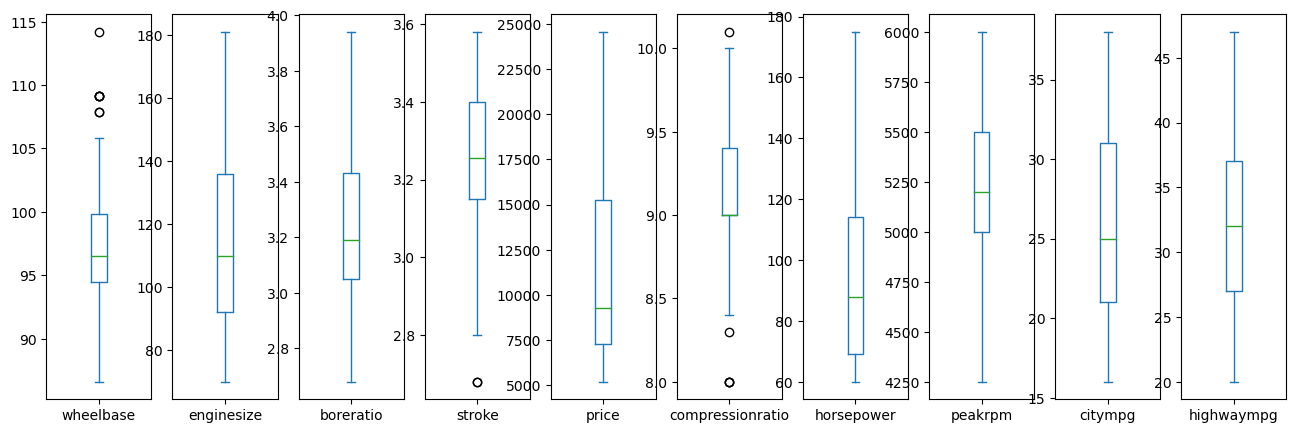

In [330]:
# Plot without outliers
df[columns].plot(kind='box', subplots=True, layout=(1, 10), figsize=(16, 5), sharey=False)

In [331]:
#without outliers csv
df.to_csv('car_price.csv', index=False)

In [332]:
df = pd.read_csv("car_price.csv")

In [333]:
df.shape

(129, 26)

In [334]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [335]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [337]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_encoder = LabelEncoder()
nominal_columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem','enginetype']

for column in nominal_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [338]:
ordinal_encoder = OrdinalEncoder()
ordinal_mappings = {
    'doornumber': ['two', 'four'],
    'cylindernumber': ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
}

for column, order in ordinal_mappings.items():
    ord_encoder = OrdinalEncoder(categories=[order])
    df[column] = ord_encoder.fit_transform(df[[column]])


In [339]:
df_encode = pd.get_dummies(df.drop(['car_ID', 'CarName', 'price'], axis=1))

X = df_encode
y = df['price']

In [340]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,0.0,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,0.0,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,0.0,2,2,0,94.5,...,152,3,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,1.0,3,1,0,99.8,...,109,3,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,1.0,3,0,0,99.4,...,136,3,3.19,3.40,8.0,115,5500,18,22,17450.0


In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [342]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [343]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 3902586.4454891686
R^2 Score: 0.819811743091451


In [344]:
print('Training set score: {:}'.format(model.score(X_train, y_train)))

print('Test set score: {:}'.format(model.score(X_test, y_test)))

Training set score: 0.8296160676014155
Test set score: 0.819811743091451


In [345]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                   Coefficient
symboling         9.170793e+01
fueltype          2.884830e-10
aspiration        2.813090e+03
doornumber        4.917587e+02
carbody          -3.701463e+02
drivewheel        7.896664e+02
enginelocation    9.094947e-13
wheelbase         1.322494e+02
carlength        -5.402863e+01
carwidth          1.055588e+02
carheight        -4.886425e+01
curbweight        2.121167e+00
enginetype        3.948328e+02
cylindernumber    3.326443e+03
enginesize       -6.370391e+01
fuelsystem        6.008809e+02
boreratio         5.945007e+03
stroke           -2.171545e+03
compressionratio  7.233336e+02
horsepower        3.432188e+00
peakrpm           1.023786e+00
citympg          -5.650593e+02
highwaympg        2.754010e+02


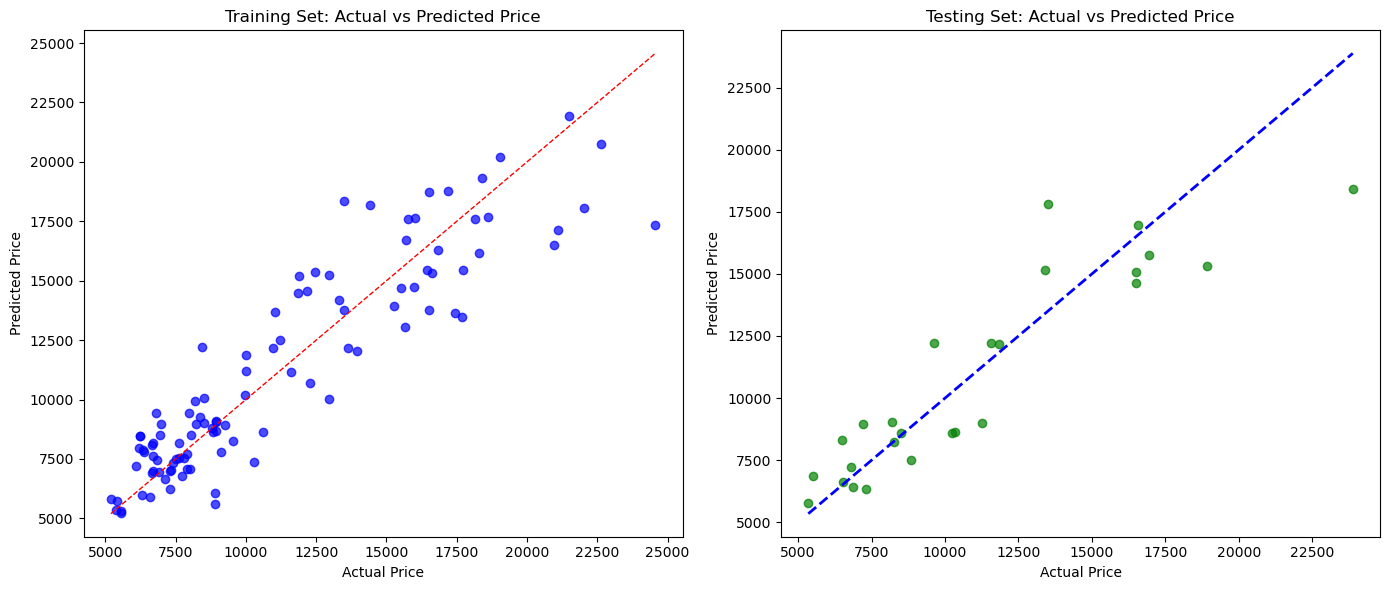

In [347]:
plt.figure(figsize=(14, 6))

#training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, color="blue") 
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Set: Actual vs Predicted Price')

#testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color="green")  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Set: Actual vs Predicted Price')

plt.tight_layout() 
plt.show() 

TASK 2:
Scenario:
You are provided with a dataset and your task is to determine whether applying linear regression is
appropriate. Remember the fundamental assumptions of linear regression while making your
decision.
Dataset Description:
The dataset contains numerical values representing various factors related to monthly electricity
consumption in households. The features include the number of residents, average income, and the
age of the house. The target variable is the monthly electricity consumption in kilowatt-hours.
Task Instructions:
Review the Dataset:
Familiarize yourself with the dataset, noting the features and the target variable.
Assumption Consideration:
Reflect on the key assumptions of linear regression: linearity, independence, homoscedasticity,
normality of residuals, and absence of perfect multicollinearity.
Think about how these assumptions relate to the dataset. Consider whether the data might meet these
assumptions or present challenges.
Decision Making:
Based solely on your understanding of the assumptions and by doing analysis, decide whether linear
regression is suitable for this dataset. Provide a brief rationale for your decision.
Justification:
If you decided that linear regression is appropriate, outline why you believe the dataset meets the
assumptions. If you decided against linear regression, briefly explain which assumptions you think
the dataset violates.

In [487]:
df1 = pd.read_csv("electricity_bill_dataset.csv")

In [488]:
df1.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [489]:
df1.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [490]:
df1.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [491]:
df1.duplicated().sum()

0

In [492]:
df1.shape

(45345, 12)

In [493]:
columns = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor','Month',
           'MonthlyHours', 'TariffRate', 'ElectricityBill']

Fan                   Axes(0.125,0.11;0.065678x0.77)
Refrigerator       Axes(0.203814,0.11;0.065678x0.77)
AirConditioner     Axes(0.282627,0.11;0.065678x0.77)
Television         Axes(0.361441,0.11;0.065678x0.77)
Monitor            Axes(0.440254,0.11;0.065678x0.77)
Month              Axes(0.519068,0.11;0.065678x0.77)
MonthlyHours       Axes(0.597881,0.11;0.065678x0.77)
TariffRate         Axes(0.676695,0.11;0.065678x0.77)
ElectricityBill    Axes(0.755508,0.11;0.065678x0.77)
dtype: object

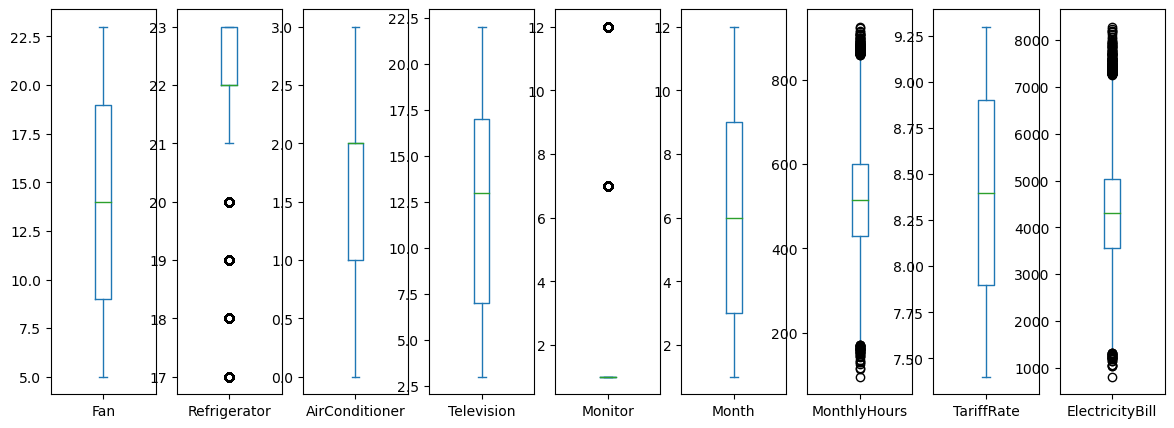

In [494]:
df1[columns].plot(kind='box', subplots=True, layout=(1, 10), figsize=(16, 5))

In [495]:
for column in columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

Fan                   Axes(0.125,0.11;0.065678x0.77)
Refrigerator       Axes(0.203814,0.11;0.065678x0.77)
AirConditioner     Axes(0.282627,0.11;0.065678x0.77)
Television         Axes(0.361441,0.11;0.065678x0.77)
Monitor            Axes(0.440254,0.11;0.065678x0.77)
Month              Axes(0.519068,0.11;0.065678x0.77)
MonthlyHours       Axes(0.597881,0.11;0.065678x0.77)
TariffRate         Axes(0.676695,0.11;0.065678x0.77)
ElectricityBill    Axes(0.755508,0.11;0.065678x0.77)
dtype: object

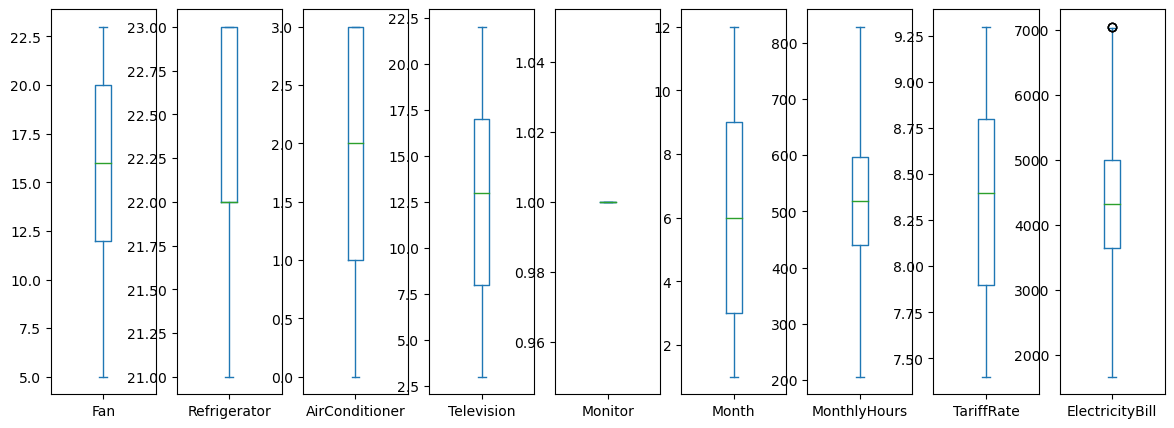

In [496]:
df1[columns].plot(kind='box', subplots=True, layout=(1, 10), figsize=(16, 5))

In [497]:
df1.to_csv('electricity.csv', index=False)

In [498]:
df1 = pd.read_csv('electricity.csv')

In [499]:
df1.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
3,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
4,13,22.0,0.0,18.0,1.0,0,6,Ratnagiri,Adani Power Ltd.,471,7.4,3485.4


In [500]:
df1.shape

(29710, 12)

In [501]:
label_encoder = LabelEncoder()

columns = ['City', 'Company', 'Month']  

for column in columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [502]:
df1.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,9,5,27,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,4,15,13,488,7.8,3806.4
2,7,22.0,3.0,21.0,1.0,0,5,7,19,475,9.2,4370.0
3,11,23.0,2.0,11.0,1.0,0,1,7,20,457,9.2,4204.4
4,13,22.0,0.0,18.0,1.0,0,5,13,0,471,7.4,3485.4


In [503]:
X = df1.iloc[:,0:11]
y = df1.iloc[:,-1]

In [504]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [505]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [506]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(mse_test)
print(r2_train)
print(r2_test)

4034.494929952732
0.9958338784296421
0.9955875491755124


In [507]:
print('Training set score: {:}'.format(model.score(X_train, y_train)))
print('Test set score: {:}'.format(model.score(X_test, y_test)))

Training set score: 0.9958338784296421
Test set score: 0.9955875491755124


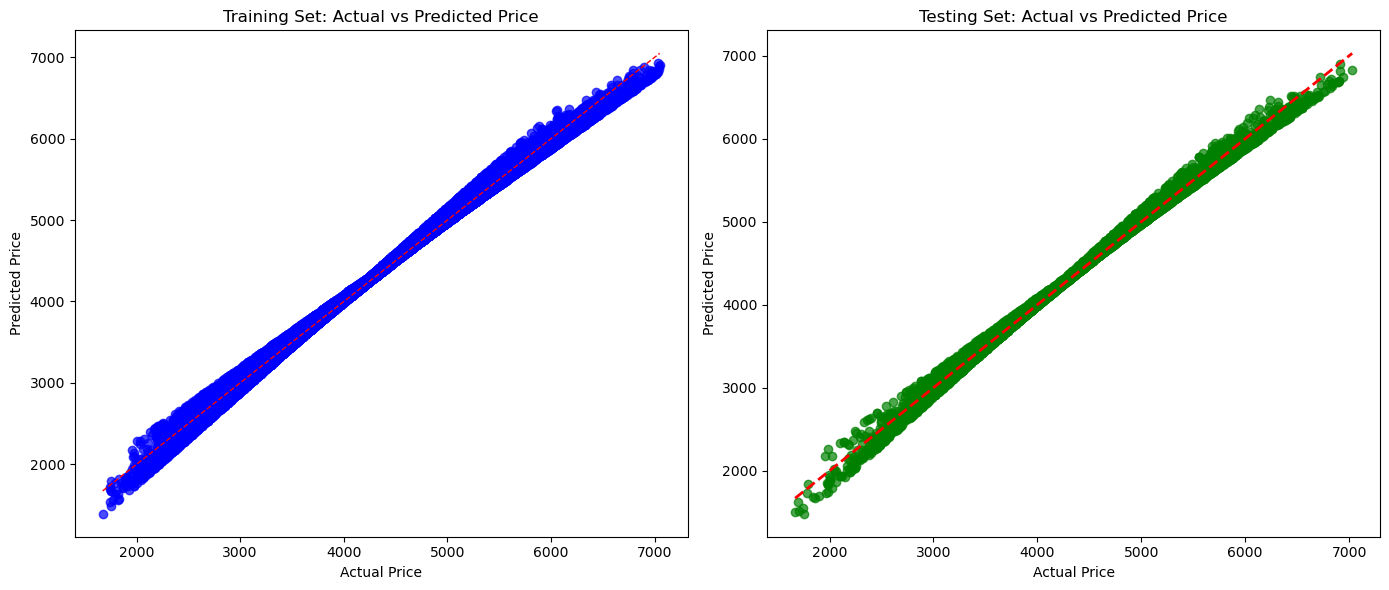

In [525]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot for the training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Set: Actual vs Predicted Price')

# Plot for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Set: Actual vs Predicted Price')

plt.tight_layout()
plt.show()


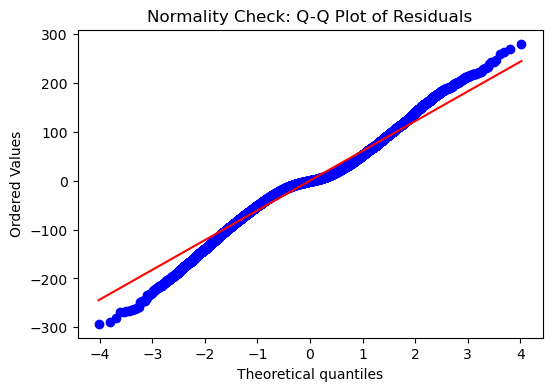

In [517]:
import scipy.stats as stats

residuals = y_train - y_train_pred

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality Check: Q-Q Plot of Residuals')
plt.show()


Text(0.5, 1.0, 'Homoscedasticity Check')

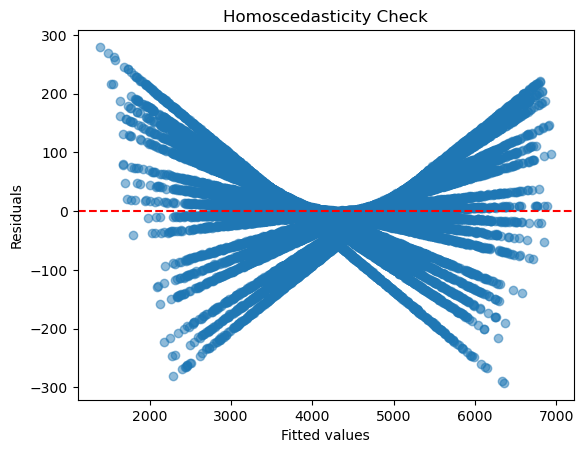

In [522]:
plt.figure()
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')

Since both MonthlyHours and TariffRate have a strong linear relationship with ElectricityBill, applying linear regression is appropriate for this dataset. This model is expected to yield useful predictions of electricity consumption, primarily influenced by MonthlyHours and TariffRate variables.

# Q3

# 1. K-Nearest Neighbors (KNN)

# Assumptions:

KNN is a non-parametric method, meaning it does not assume a specific form for the underlying data distribution.
Since it relies on distance calculations, feature scaling (normalization or standardization) is essential to ensure fair contribution from all features.
It presumes each data point is independent of others.

# Considerations:
KNN can struggle with high-dimensional datasets due to the "curse of dimensionality," which reduces the effectiveness of distance metrics in higher dimensions.
This algorithm is better suited for smaller datasets and is sensitive to the choice of the parameter 
𝐾
K (the number of neighbors).


# 2. Decision Trees

# Assumptions:

Decision trees are also non-parametric and do not require assumptions about the data distribution.
They can handle correlated features without requiring independence among them.
The model is sensitive to the representativeness of the dataset, as it may overfit if the data contains noise.

# Considerations:
Decision trees are prone to overfitting, especially if they are deep and unpruned.
Although they are interpretable, uncontrolled tree growth can lead to complexity. Constraints like maximum depth or minimum samples per leaf help mitigate this.


# 3. Ensemble Learning (Voting Classifiers)

# Assumptions:

Voting classifiers benefit from model diversity. They are most effective when combined models (e.g., KNN, Decision Trees) have complementary strengths and weaknesses.
For optimal performance, each model should ideally make independent predictions.

# Considerations:
Ensemble models perform well when individual models have decent but diverse performance.
They are often used in classification tasks (binary or multiclass) to reduce the error from individual models by leveraging multiple perspectives.


# 4. AdaBoost (Adaptive Boosting)

# Assumptions:

AdaBoost typically assumes weak base learners, like shallow decision trees, which it improves by focusing more on instances that previous models misclassified.
The method works best when the data is relatively clean and noise-free.

# Considerations:
AdaBoost is highly effective for binary classification and works in some multiclass problems, though it's sensitive to noise and outliers.
Tuning the number of estimators is critical, as too many weak learners can lead to overfitting.


# 5. XGBoost (Extreme Gradient Boosting)

# Assumptions:

XGBoost is robust to various data types and can handle missing values and outliers through built-in capabilities.
Similar to AdaBoost, it sequentially builds models to minimize the errors of previous models.

# Considerations:

XGBoost is highly efficient for large datasets and works well with structured data due to parallelization.
It performs effectively in cases where there are complex relationships between features, making it ideal for non-linear tasks.

# 6. Random Forest

# Assumptions:

As a non-parametric method, Random Forest doesn’t assume any specific data distribution, making it flexible across different types of data.
Trees in the forest are trained on random subsets of the data and features, reducing overfitting risks.

# Considerations:
Random Forest is well-suited for large datasets and can handle missing values and high-dimensional data.
It may need tuning to avoid overfitting, especially if the forest has too many trees or if individual trees are too deep.